## <strong><center>Importing the <span style= "color: #FDCA40">packeges

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
import warnings
import sqlite3

In [2]:
%matplotlib inline
plt.rcParams['font.family'] = 'Nirmala UI' # 

warnings.filterwarnings('ignore')

COLORS          : list = ['#080708', '#3772FF', '#DF2935', '#FDCA40', '#E6E8E6']
FONT            : int  = 17
PAD             : int  = 10

## <center><strong>Data reading & basic <span style= 'color: #FDCA40'> Exploring

In [3]:
conn = sqlite3.connect("../database.db")
df = pd.read_sql_query("SELECT * from `movies_data`", conn)

conn.close()

In [4]:
cm = sns.light_palette(COLORS[1], as_cmap=True)
display(df.drop(['overview', 'genres', 'production_companies', 'tagline'], axis= 1)
        .sample(5).style.background_gradient(cmap= cm))

,movie_id,movie_title,popularity,rating,runtime,revenue,release_date,vote_count,budget
52,1153222,LEGO Disney Princess: The Castle Quest,325,6.800000,47,0,2023-08-18 00:00:00,13,0
931,877269,Strange World,45,6.434000,102,73621640,2022-11-23 00:00:00,1045,180000000
648,37165,The Truman Show,62,8.132000,103,264118201,1998-06-04 00:00:00,16694,60000000
449,166426,Pirates of the Caribbean: Dead Men Tell No Tales,74,6.646000,128,795922298,2017-05-23 00:00:00,11113,230000000
619,76338,Thor: The Dark World,52,6.540000,112,644783140,2013-10-30 00:00:00,16279,170000000


In [5]:
display(df.drop(['overview', 'genres', 'production_companies', 'tagline'], axis= 1)
        .sample(5).style.applymap(lambda val: f'background-color: {COLORS[2]}' if val == 0 else ''))

,movie_id,movie_title,popularity,rating,runtime,revenue,release_date,vote_count,budget
919,798286,Beau Is Afraid,49,6.890000,179,10000000,2023-04-14 00:00:00,472,35000000
143,916224,すずめの戸締まり,180,7.961000,123,321092572,2022-11-11 00:00:00,633,0
92,550988,Free Guy,213,7.558000,115,331526598,2021-08-11 00:00:00,7566,110000000
483,9552,The Exorcist,69,7.717000,122,441405644,1973-12-26 00:00:00,7157,12000000
869,347201,BORUTO -NARUTO THE MOVIE-,44,7.603000,95,39500000,2015-08-07 00:00:00,1301,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              968 non-null    int64  
 1   movie_title           968 non-null    object 
 2   overview              968 non-null    object 
 3   popularity            968 non-null    int64  
 4   rating                968 non-null    float64
 5   tagline               968 non-null    object 
 6   runtime               968 non-null    int64  
 7   revenue               968 non-null    int64  
 8   release_date          968 non-null    object 
 9   vote_count            968 non-null    int64  
 10  budget                968 non-null    int64  
 11  genres                968 non-null    object 
 12  production_companies  968 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 98.4+ KB


In [7]:
cm = sns.light_palette(COLORS[3], as_cmap=True)
df.describe().style.background_gradient(cmap=cm)

,movie_id,popularity,rating,runtime,revenue,vote_count,budget
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,468649.192149,127.695248,6.799790,109.394628,219974608.677686,4782.420455,53055680.923554
std,379973.522125,242.847821,1.154323,25.379788,358112035.113337,6331.424999,76079894.105040
min,11.000000,35.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,56054.250000,57.000000,6.300000,93.000000,0.000000,147.250000,0.000000
50%,446464.000000,70.500000,6.945500,105.000000,40481183.000000,1615.500000,13500000.000000
75%,805321.750000,102.000000,7.511500,123.000000,321551898.000000,7675.000000,85000000.000000
max,1163045.000000,4546.000000,10.000000,242.000000,2923706026.000000,34329.000000,586573920.000000


## <center><strong>Visualizing data <span style= 'color: #FDCA40'> Issues

In [8]:
df['movie_title'].duplicated().sum()

0

In [9]:
def add_bar_labels(x,y, ax, scaler= 0):
    for i in range(len(x)):
        ax.text(i, y[i] + scaler , '{:,}'.format(y[i]), ha = 'center')
        
        
def format_large_numbers(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.0f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.0f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.0f}K'
    else:
        return str(int(x))

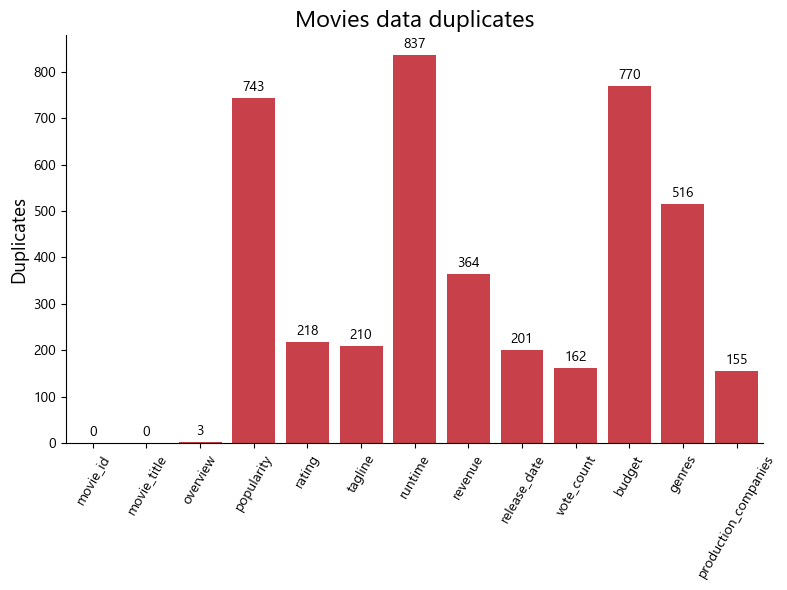

In [10]:
fig, ax = plt.subplots()

movies_duplicates = df.apply(lambda x: x.duplicated().sum())

sns.barplot(x= movies_duplicates.index, y= movies_duplicates.values, color= COLORS[2], ax= ax)

add_bar_labels(movies_duplicates.index,  movies_duplicates.values, ax, scaler= 15)

ax.set_title('Movies data duplicates'  , fontsize= FONT)
ax.set_ylabel('Duplicates'             , fontsize= FONT * 4/5)

plt.sca(ax)
plt.xticks(rotation=60)

ax.spines[['right', 'top']].set_visible(False)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.set_size_inches(8, 6)
plt.tight_layout()
plt.show()

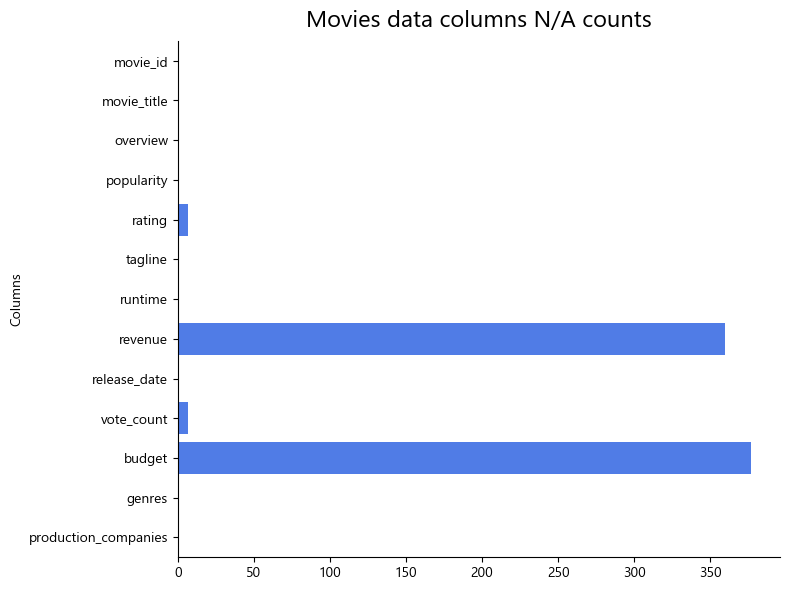

In [11]:
fig, ax = plt.subplots()

null_count = []

for col in df.columns:
    null_count.append(df[col].isnull().sum() + (df[col] == 0).sum())


sns.barplot(x= null_count, y= df.columns,
            color= COLORS[1])

plt.sca(ax)
plt.ylabel('Columns')
sns.despine()

ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))


ax.set_title('Movies data columns N/A counts', fontsize=FONT, pad= PAD)

fig.set_size_inches(8, 6)
plt.tight_layout()
plt.show()

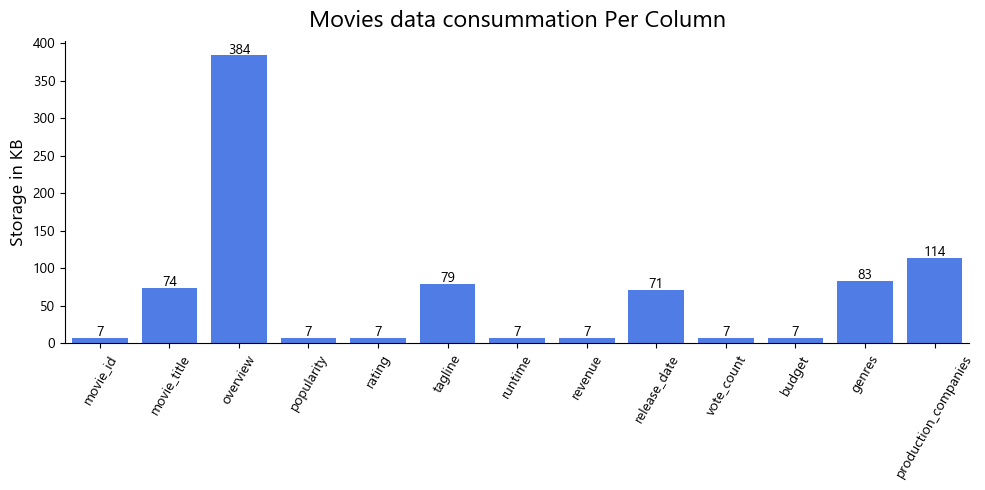

In [12]:
fig, ax = plt.subplots()


data_consumation  = df.memory_usage(index=False, deep=True).values // 1024
cols              = df.memory_usage(index=False, deep=True).index

sns.barplot(x= cols, y= data_consumation, color= COLORS[1],  ax= ax)
add_bar_labels(cols, data_consumation, ax, scaler= 2)


plt.sca(ax)
sns.despine()

ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.spines['right'] .set_visible(False)
ax.spines['top']   .set_visible(False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(cols, rotation=60)

ax.set_ylabel('Storage in KB', fontsize= FONT / 1.3)
ax.set_title('Movies data consummation Per Column', fontsize= FONT, pad= PAD)

fig.set_size_inches(10, 5)

plt.tight_layout()
plt.show()

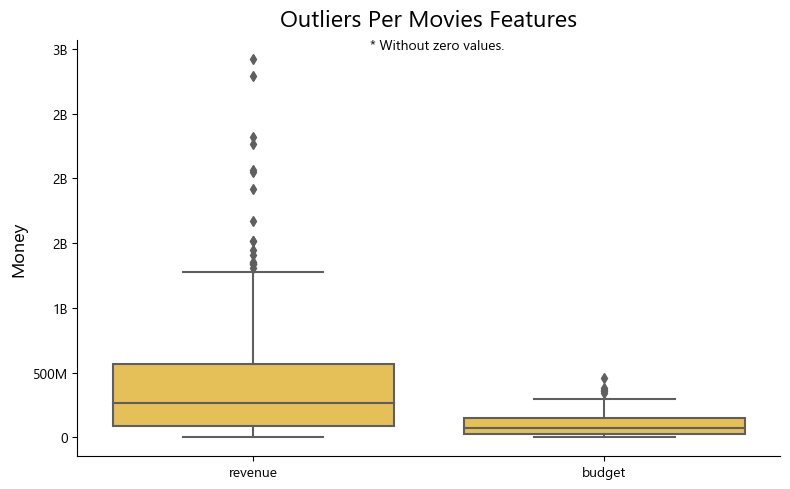

In [13]:
fig, ax = plt.subplots()

mask = (df == 0).any(axis=1)
chart_data = df[~mask][['revenue', 'budget']]

sns.boxplot(data= chart_data, palette= [COLORS[3]], ax=ax)

ax.set_ylabel('Money', fontsize= FONT / 1.3)
ax.set_title('Outliers Per Movies Features', fontsize= FONT, pad= PAD)

ax.spines['right']   .set_visible(False)
ax.spines['top']     .set_visible(False)

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_large_numbers))
plt.text(s= '* Without zero values.', y= 3_000_000_000, x= 1/3)

fig.set_size_inches(8, 5)

plt.tight_layout()
plt.show()

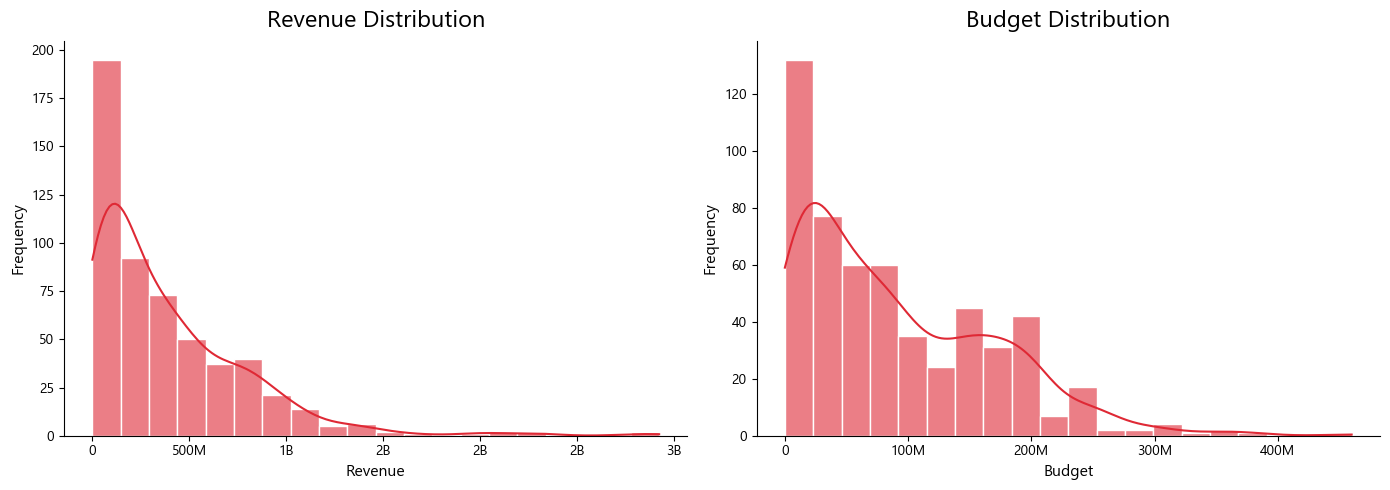

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns .histplot(chart_data['revenue'] , bins= 20, kde= True, ax= ax1, edgecolor= 'white',
              color= COLORS[2], alpha= 0.6)

sns .histplot(chart_data['budget']  , bins= 20, kde= True, ax= ax2, edgecolor= 'white',
             color= COLORS[2], alpha= 0.6)


ax1.set_title('Revenue Distribution', fontsize= FONT, pad= PAD)
ax1.set_xlabel('Revenue',   fontsize= FONT / 1.5)

ax2.set_title('Budget Distribution', fontsize= FONT, pad= PAD)
ax2.set_xlabel('Budget',     fontsize= FONT / 1.5)


for ax in (ax1, ax2):
    ax.set_ylabel('Frequency',  fontsize= FONT / 1.5)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_large_numbers))
    ax.spines['right'] .set_visible(False)
    ax.spines['top']   .set_visible(False)


plt.tight_layout()
plt.show()

## <center><strong> Data Issues we can <span style= "color: #FDCA40">Conclude

#### Our Data Issues & Findings:
- Useless Unamed column.
- There are many zeros that indicates NANs in every column of the data. <sub>*(Except `overview` & `tagline` they have real NANs)</sub>
- The most of the zero values are in the Revenue & Budget columns whitch should be fixed.
- There are some columns that need DType optimization to be more memory effecient.
- The Revenues & Budget outliers are kinda rare but still they need to be fixed.
- The Histogram is right tail skewed histogram.

#### **Important note:**

The zero values have been removed from the data in the Histogram and the Box-plot 